In [1]:
import json
import os 
from PIL import Image
import cv2 as cv2
import numpy as np
import math
import imutils
import random

import matplotlib.pyplot as plt
%matplotlib inline

%reset out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (0 entries)


In [7]:
#IMAGES_PATH = '/home/abert/Documents/NumeriCube/eurosilicone/angle/ds/TEST_MODEL_1/train/'  
#OUTPUT_PATH = '/home/abert/Documents/NumeriCube/eurosilicone/angle/ds/TEST_MODEL_1/train_rotated/'
IMAGES_PATH = '../dataset/step3_orientationfixer/img_train/
OUTPUT_PATH = '/home/abert/Documents/NumeriCube/eurosilicone/angle/ds/ds_rotated/test1/test2_corr/ 
images = os.listdir(IMAGES_PATH)


for index, im in enumerate(images):
    
    print(im)
    img = cv2.imread(IMAGES_PATH + im)

    angle = random.randint(0,360)

    img3 = imutils.rotate(img,angle)
    
    cv2.imwrite( OUTPUT_PATH+im, img3 )

    print('image ', index, 'done')
        
        
    print('finito')

FULL-2019-04-26-154943.png
image  0 done
finito
FULL-2019-04-26-161428.png
image  1 done
finito
FULL-2019-04-26-143540.png
image  2 done
finito
FULL-2019-04-26-154625.png
image  3 done
finito
FULL-2019-04-26-153821.png
image  4 done
finito
FULL-2019-04-26-160716.png
image  5 done
finito
FULL-2019-04-26-150032.png
image  6 done
finito
FULL-2019-04-26-154813.png
image  7 done
finito
FULL-2019-04-26-153839.png
image  8 done
finito
FULL-2019-04-26-140922.png
image  9 done
finito
FULL-2019-04-26-144803.png
image  10 done
finito
FULL-2019-04-26-144550.png
image  11 done
finito
FULL-2019-04-26-161049.png
image  12 done
finito
FULL-2019-04-26-145333.png
image  13 done
finito
FULL-2019-04-26-154317.png
image  14 done
finito
FULL-2019-04-26-145352.png
image  15 done
finito
FULL-2019-04-26-144532.png
image  16 done
finito
FULL-2019-04-26-153019.png
image  17 done
finito
FULL-2019-04-26-155958.png
image  18 done
finito
FULL-2019-04-26-160624.png
image  19 done
finito
FULL-2019-04-26-151313.png
ima

In [2]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from keras import backend as K





def classify(im,model):
    """Classifies an image (np array or keras array)
        See here for difference:
        https://stackoverflow.com/questions/53718409/numpy-array-vs-img-to-array
    Parameters:
    im: numpy array
        The image to classify
    Returns:
    classe[0] : int
        in [0, 1, 2] corresponding to ['godet-vide', 'pet-clair', 'pet-fonce']
    or 
    in [0, 1, 2, 3] corresponding to ['godet-vide', 'pe-hd-opaque','pet-clair', 'pet-fonce']
    
    depending on which trained model is used.
   """

    print('classifying')
    classe = model.predict(im)
    #print(classe)
    classe =classe.argmax(axis = 1) #taking index of the maximum %
    #print(classe)
    return classe[0]

def angle_difference(x, y):
    """
    Calculate minimum difference between two angles.
    """
    return 180 - abs(abs(x - y) - 180)


def angle_error(y_true, y_pred):
    """
    Calculate the mean diference between the true angles
    and the predicted angles. Each angle is represented
    as a binary vector.
    """
    diff = angle_difference(K.argmax(y_true), K.argmax(y_pred))
    print(K.argmax(y_true), K.argmax(y_pred))
    return K.mean(K.cast(K.abs(diff), K.floatx()))


dcode ={'0': 0, '1': 1, '10': 2, '100': 3, '101': 4, '102': 5, '103': 6, '104': 7, '105': 8, '106': 9, '107': 10, '108': 11, '109': 12, '11': 13, '110': 14, '111': 15, '112': 16, '113': 17, '114': 18, '115': 19, '116': 20, '117': 21, '118': 22, '119': 23, '12': 24, '120': 25, '121': 26, '122': 27, '123': 28, '124': 29, '125': 30, '126': 31, '127': 32, '128': 33, '129': 34, '13': 35, '130': 36, '131': 37, '132': 38, '133': 39, '134': 40, '135': 41, '136': 42, '137': 43, '138': 44, '139': 45, '14': 46, '140': 47, '141': 48, '142': 49, '143': 50, '144': 51, '145': 52, '146': 53, '147': 54, '148': 55, '149': 56, '15': 57, '150': 58, '151': 59, '152': 60, '153': 61, '154': 62, '155': 63, '156': 64, '157': 65, '158': 66, '159': 67, '16': 68, '160': 69, '161': 70, '162': 71, '163': 72, '164': 73, '165': 74, '166': 75, '167': 76, '168': 77, '169': 78, '17': 79, '170': 80, '171': 81, '172': 82, '173': 83, '174': 84, '175': 85, '176': 86, '177': 87, '178': 88, '179': 89, '18': 90, '180': 91, '181': 92, '182': 93, '183': 94, '184': 95, '185': 96, '186': 97, '187': 98, '188': 99, '189': 100, '19': 101, '190': 102, '191': 103, '192': 104, '193': 105, '194': 106, '195': 107, '196': 108, '197': 109, '198': 110, '199': 111, '2': 112, '20': 113, '200': 114, '201': 115, '202': 116, '203': 117, '204': 118, '205': 119, '206': 120, '207': 121, '208': 122, '209': 123, '21': 124, '210': 125, '211': 126, '212': 127, '213': 128, '214': 129, '215': 130, '216': 131, '217': 132, '218': 133, '219': 134, '22': 135, '220': 136, '221': 137, '222': 138, '223': 139, '224': 140, '225': 141, '226': 142, '227': 143, '228': 144, '229': 145, '23': 146, '230': 147, '231': 148, '232': 149, '233': 150, '234': 151, '235': 152, '236': 153, '237': 154, '238': 155, '239': 156, '24': 157, '240': 158, '241': 159, '242': 160, '243': 161, '244': 162, '245': 163, '246': 164, '247': 165, '248': 166, '249': 167, '25': 168, '250': 169, '251': 170, '252': 171, '253': 172, '254': 173, '255': 174, '256': 175, '257': 176, '258': 177, '259': 178, '26': 179, '260': 180, '261': 181, '262': 182, '263': 183, '264': 184, '265': 185, '266': 186, '267': 187, '268': 188, '269': 189, '27': 190, '270': 191, '271': 192, '272': 193, '273': 194, '274': 195, '275': 196, '276': 197, '277': 198, '278': 199, '279': 200, '28': 201, '280': 202, '281': 203, '282': 204, '283': 205, '284': 206, '285': 207, '286': 208, '287': 209, '288': 210, '289': 211, '29': 212, '290': 213, '291': 214, '292': 215, '293': 216, '294': 217, '295': 218, '296': 219, '297': 220, '298': 221, '299': 222, '3': 223, '30': 224, '300': 225, '301': 226, '302': 227, '303': 228, '304': 229, '305': 230, '306': 231, '307': 232, '308': 233, '309': 234, '31': 235, '310': 236, '311': 237, '312': 238, '313': 239, '314': 240, '315': 241, '316': 242, '317': 243, '318': 244, '319': 245, '32': 246, '320': 247, '321': 248, '322': 249, '323': 250, '324': 251, '325': 252, '326': 253, '327': 254, '328': 255, '329': 256, '33': 257, '330': 258, '331': 259, '332': 260, '333': 261, '334': 262, '335': 263, '336': 264, '337': 265, '338': 266, '339': 267, '34': 268, '340': 269, '341': 270, '342': 271, '343': 272, '344': 273, '345': 274, '346': 275, '347': 276, '348': 277, '349': 278, '35': 279, '350': 280, '351': 281, '352': 282, '353': 283, '354': 284, '355': 285, '356': 286, '357': 287, '358': 288, '359': 289, '36': 290, '37': 291, '38': 292, '39': 293, '4': 294, '40': 295, '41': 296, '42': 297, '43': 298, '44': 299, '45': 300, '46': 301, '47': 302, '48': 303, '49': 304, '5': 305, '50': 306, '51': 307, '52': 308, '53': 309, '54': 310, '55': 311, '56': 312, '57': 313, '58': 314, '59': 315, '6': 316, '60': 317, '61': 318, '62': 319, '63': 320, '64': 321, '65': 322, '66': 323, '67': 324, '68': 325, '69': 326, '7': 327, '70': 328, '71': 329, '72': 330, '73': 331, '74': 332, '75': 333, '76': 334, '77': 335, '78': 336, '79': 337, '8': 338, '80': 339, '81': 340, '82': 341, '83': 342, '84': 343, '85': 344, '86': 345, '87': 346, '88': 347, '89': 348, '9': 349, '90': 350, '91': 351, '92': 352, '93': 353, '94': 354, '95': 355, '96': 356, '97': 357, '98': 358, '99': 359}



"""

def main():

    HEIGHT = 224
    WIDTH = 224

    model = load_model('vide_petc_petf-vgg16-20190423141400.h5')

    im_path = './dataset/wsEN4iv2SliFUuYNXIM-5Q_0b9FT9bgTKSFE4NaMtMCwA_320x200.png'

    img = image.load_img(im_path, target_size=(HEIGHT, WIDTH)) #resize
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)# correct shape for classification

    print(classify(img,model))

"""

Using TensorFlow backend.


"\n\ndef main():\n\n    HEIGHT = 224\n    WIDTH = 224\n\n    model = load_model('vide_petc_petf-vgg16-20190423141400.h5')\n\n    im_path = './dataset/wsEN4iv2SliFUuYNXIM-5Q_0b9FT9bgTKSFE4NaMtMCwA_320x200.png'\n\n    img = image.load_img(im_path, target_size=(HEIGHT, WIDTH)) #resize\n    img = image.img_to_array(img)\n    img = np.expand_dims(img, axis=0)# correct shape for classification\n\n    print(classify(img,model))\n\n"

In [3]:
import time
from keras_preprocessing.image import ImageDataGenerator


#IMAGES_PATH = '/home/abert/Documents/NumeriCube/eurosilicone/angle/ds/TEST_MODEL_1/train_rotated/'
#OUTPUT_PATH = '/home/abert/Documents/NumeriCube/eurosilicone/angle/ds/TEST_MODEL_1/train_corrected/'
IMAGES_PATH = '../dataset/step3_orientationfixer/img_train/'
OUTPUT_PATH = '/home/abert/Documents/NumeriCube/eurosilicone/angle/ds/ds_rotated/test_corr/'
images = os.listdir(IMAGES_PATH)
model = load_model('./models/rotnet_chip_resnet50_v4.hdf5',custom_objects={'angle_error': angle_error})

# data generator for test set


Instructions for updating:
Colocations handled automatically by placer.
Tensor("metrics/angle_error/ArgMax_2:0", shape=(?,), dtype=int64) Tensor("metrics/angle_error/ArgMax_3:0", shape=(?,), dtype=int64)
Instructions for updating:
Use tf.cast instead.


['FULL-2019-04-26-154943.png', 'FULL-2019-05-16-141629.png', 'FULL-2019-05-16-150646.png', 'FULL-2019-04-26-144803.png', 'FULL-2019-04-26-134020.png', 'FULL-2019-04-26-121832.png', 'FULL-2019-05-16-145009.png', 'FULL-2019-04-26-140104.png', 'FULL-2019-05-16-142730.png', 'FULL-2019-04-26-155958.png', 'FULL-2019-05-16-145239.png', 'FULL-2019-05-16-150419.png', 'FULL-2019-04-26-144500.png', 'FULL-2019-04-26-154257.png', 'FULL-2019-05-16-150042.png', 'FULL-2019-04-26-144724.png', 'Image__2019-05-16__11-11-13.png', 'Image__2019-05-16__14-14-59.png', 'FULL-2019-05-16-151842.png', 'FULL-2019-04-26-152959.png', 'FULL-2019-04-26-145917.png', 'FULL-2019-04-26-153611.png', 'FULL-2019-04-26-140123.png', 'FULL-2019-05-16-143925.png', 'FULL-2019-05-16-150015.png', 'FULL-2019-05-16-143501.png', 'FULL-2019-04-26-160938.png', 'FULL-2019-04-26-150916.png', 'FULL-2019-04-26-153332.png', 'FULL-2019-04-26-144746.png', 'FULL-2019-04-26-140937.png', 'FULL-2019-05-16-151717.png', 'FULL-2019-04-26-154701.png',

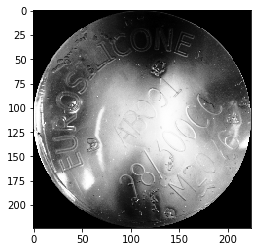

(1, 224, 224, 3)
classifying
Time =  3.313521146774292
Classe =  47
Angle = -47


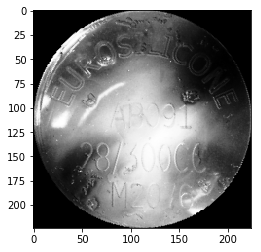

finito
FULL-2019-05-16-141629.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


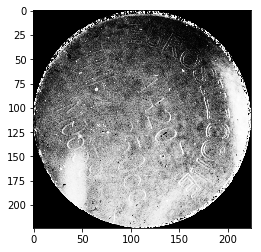

(1, 224, 224, 3)
classifying
Time =  0.054839372634887695
Classe =  287
Angle = -287


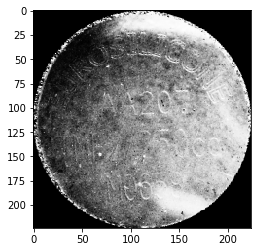

finito
FULL-2019-05-16-150646.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


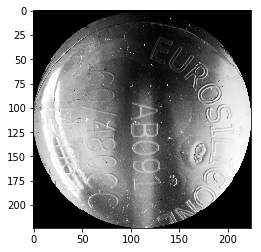

(1, 224, 224, 3)
classifying
Time =  0.049523115158081055
Classe =  274
Angle = -274


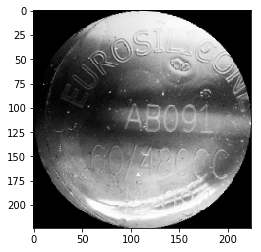

finito
FULL-2019-04-26-144803.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


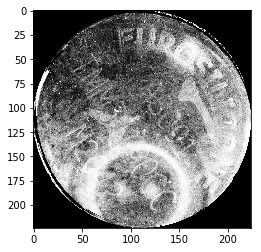

(1, 224, 224, 3)
classifying
Time =  0.05371356010437012
Classe =  296
Angle = -296


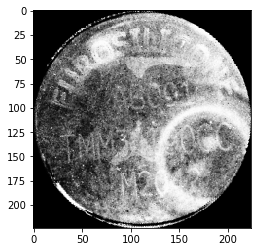

finito
FULL-2019-04-26-134020.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


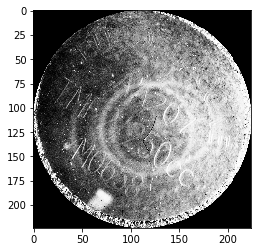

(1, 224, 224, 3)
classifying
Time =  0.053757429122924805
Classe =  330
Angle = -330


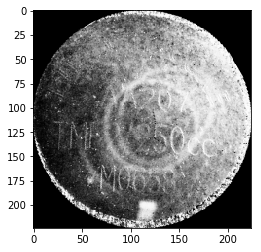

finito
FULL-2019-04-26-121832.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


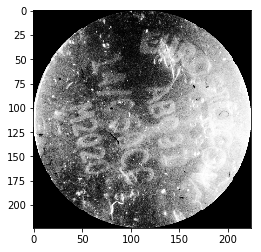

(1, 224, 224, 3)
classifying
Time =  0.052786827087402344
Classe =  283
Angle = -283


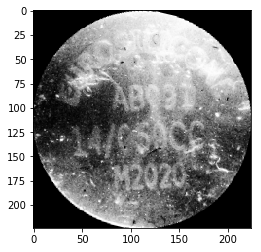

finito
FULL-2019-05-16-145009.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


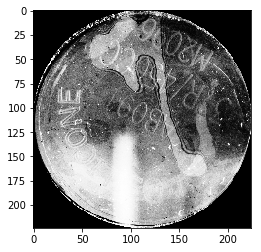

(1, 224, 224, 3)
classifying
Time =  0.055908918380737305
Classe =  149
Angle = -149


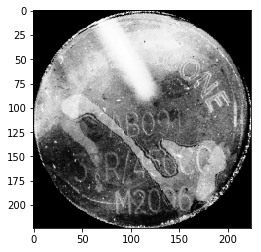

finito
FULL-2019-04-26-140104.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


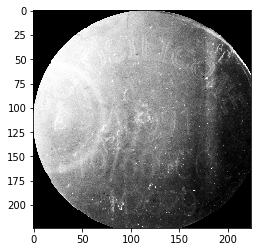

(1, 224, 224, 3)
classifying
Time =  0.05824398994445801
Classe =  0
Angle = 0


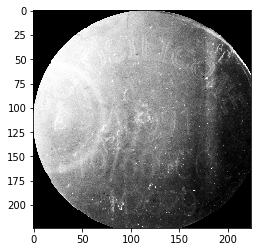

finito
FULL-2019-05-16-142730.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


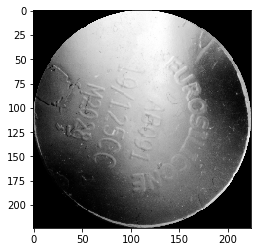

(1, 224, 224, 3)
classifying
Time =  0.04967451095581055
Classe =  255
Angle = -255


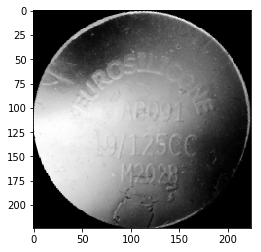

finito
FULL-2019-04-26-155958.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


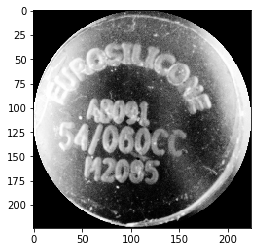

(1, 224, 224, 3)
classifying
Time =  0.05067563056945801
Classe =  1
Angle = -1


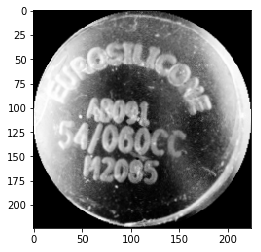

finito
FULL-2019-05-16-145239.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


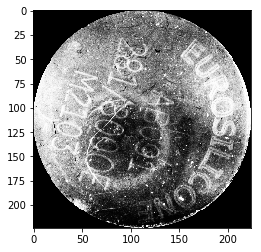

(1, 224, 224, 3)
classifying
Time =  0.05647444725036621
Classe =  255
Angle = -255


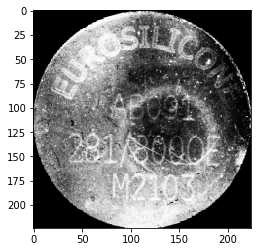

finito
FULL-2019-05-16-150419.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


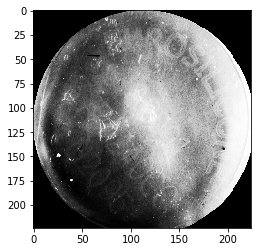

(1, 224, 224, 3)
classifying
Time =  0.055249929428100586
Classe =  304
Angle = -304


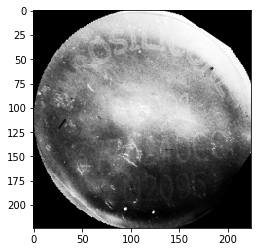

finito
FULL-2019-04-26-144500.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


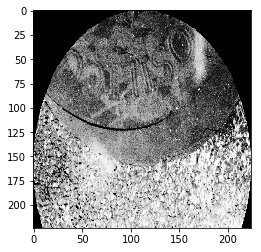

(1, 224, 224, 3)
classifying
Time =  0.05208396911621094
Classe =  174
Angle = -174


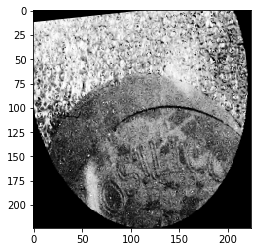

finito
FULL-2019-04-26-154257.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


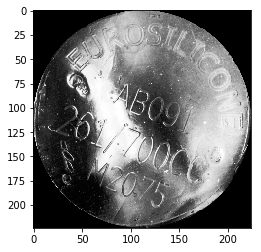

(1, 224, 224, 3)
classifying
Time =  0.055902719497680664
Classe =  339
Angle = -339


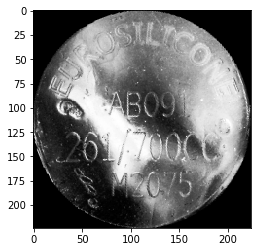

finito
FULL-2019-05-16-150042.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


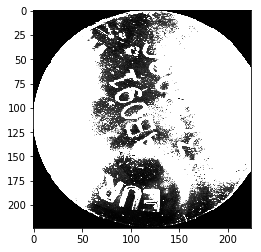

(1, 224, 224, 3)
classifying
Time =  0.04987192153930664
Classe =  112
Angle = -112


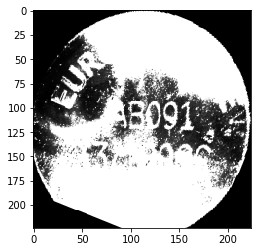

finito
FULL-2019-04-26-144724.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


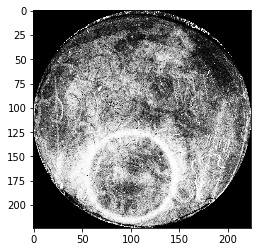

(1, 224, 224, 3)
classifying
Time =  0.05412435531616211
Classe =  179
Angle = -179


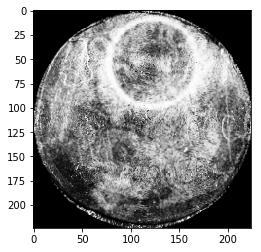

finito
Image__2019-05-16__11-11-13.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


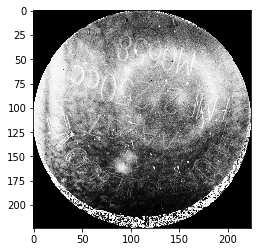

(1, 224, 224, 3)
classifying
Time =  0.05299043655395508
Classe =  169
Angle = -169


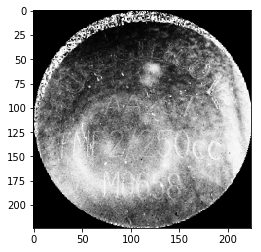

finito
Image__2019-05-16__14-14-59.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


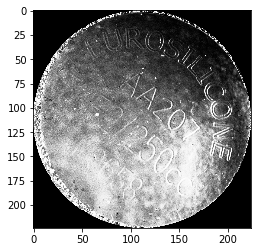

(1, 224, 224, 3)
classifying
Time =  0.05217123031616211
Classe =  320
Angle = -320


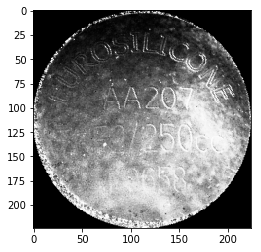

finito
FULL-2019-05-16-151842.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


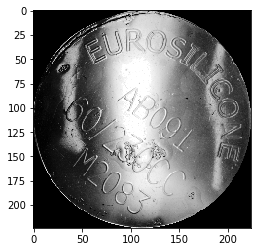

(1, 224, 224, 3)
classifying
Time =  0.05062437057495117
Classe =  324
Angle = -324


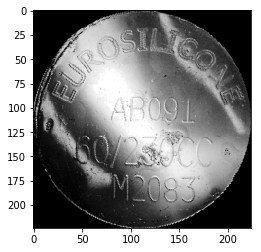

finito
FULL-2019-04-26-152959.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


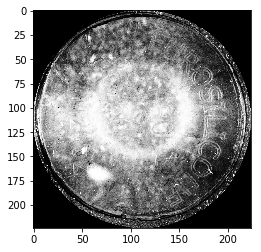

(1, 224, 224, 3)
classifying
Time =  0.05140995979309082
Classe =  277
Angle = -277


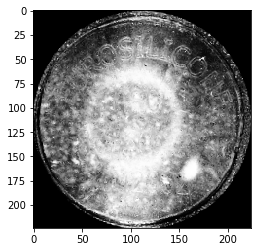

finito
FULL-2019-04-26-145917.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


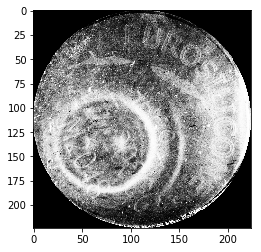

(1, 224, 224, 3)
classifying
Time =  0.05258369445800781
Classe =  297
Angle = -297


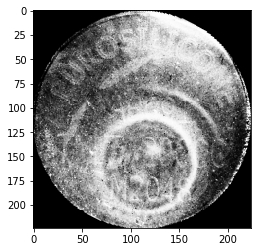

finito
FULL-2019-04-26-153611.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


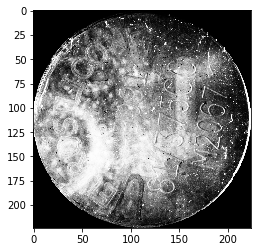

(1, 224, 224, 3)
classifying
Time =  0.05447745323181152
Classe =  89
Angle = -89


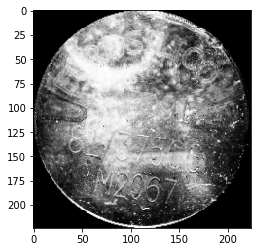

finito
FULL-2019-04-26-140123.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


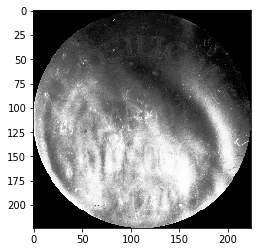

(1, 224, 224, 3)
classifying
Time =  0.05178713798522949
Classe =  8
Angle = -8


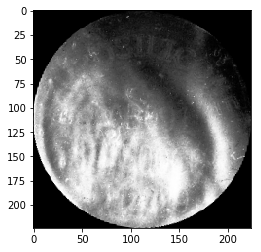

finito
FULL-2019-05-16-143925.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


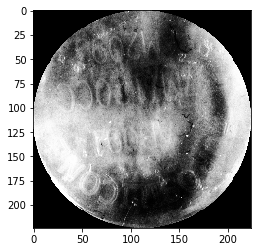

(1, 224, 224, 3)
classifying
Time =  0.054842472076416016
Classe =  186
Angle = -186


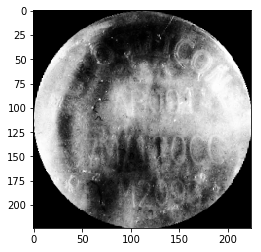

finito
FULL-2019-05-16-150015.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


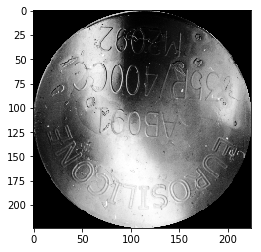

(1, 224, 224, 3)
classifying
Time =  0.050672292709350586
Classe =  177
Angle = -177


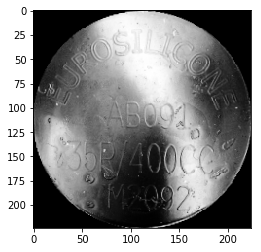

finito
FULL-2019-05-16-143501.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


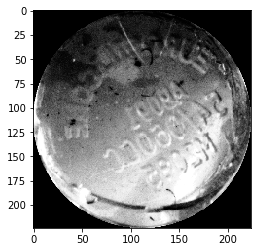

(1, 224, 224, 3)
classifying
Time =  0.05582618713378906
Classe =  37
Angle = -37


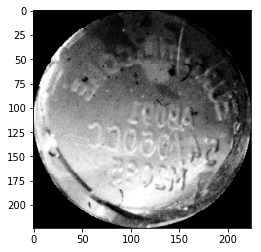

finito
FULL-2019-04-26-160938.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


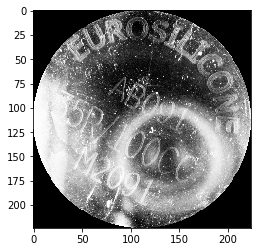

(1, 224, 224, 3)
classifying
Time =  0.053501129150390625
Classe =  340
Angle = -340


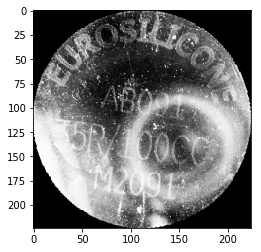

finito
FULL-2019-04-26-150916.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


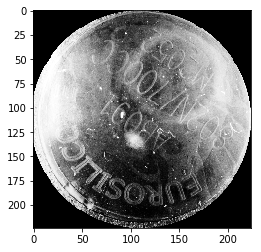

(1, 224, 224, 3)
classifying
Time =  0.05953478813171387
Classe =  149
Angle = -149


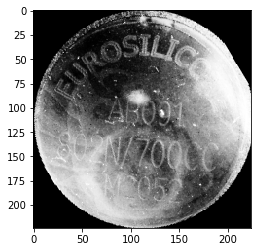

finito
FULL-2019-04-26-153332.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


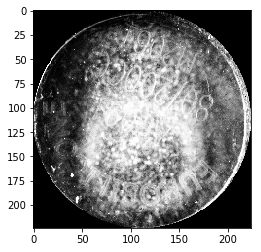

(1, 224, 224, 3)
classifying
Time =  0.05722784996032715
Classe =  160
Angle = -160


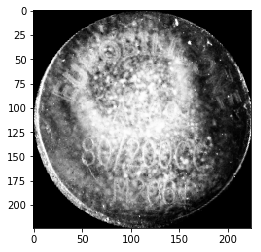

finito
FULL-2019-04-26-144746.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


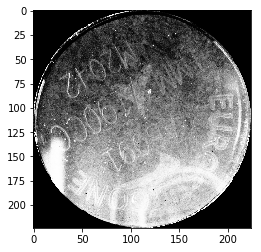

(1, 224, 224, 3)
classifying
Time =  0.0532834529876709
Classe =  213
Angle = -213


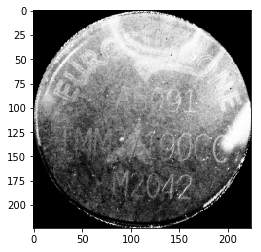

finito
FULL-2019-04-26-140937.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


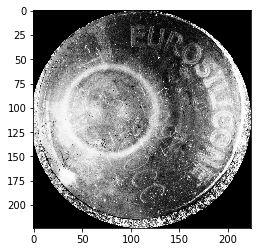

(1, 224, 224, 3)
classifying
Time =  0.05267143249511719
Classe =  294
Angle = -294


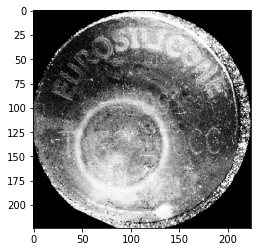

finito
FULL-2019-05-16-151717.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


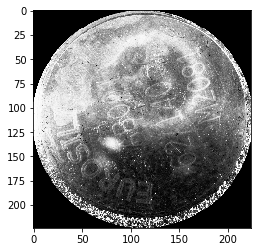

(1, 224, 224, 3)
classifying
Time =  0.05575418472290039
Classe =  110
Angle = -110


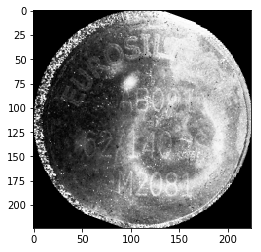

finito
FULL-2019-04-26-154701.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


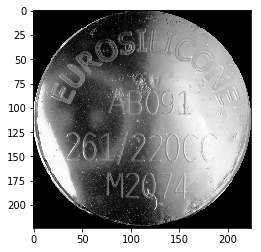

(1, 224, 224, 3)
classifying
Time =  0.05972003936767578
Classe =  1
Angle = -1


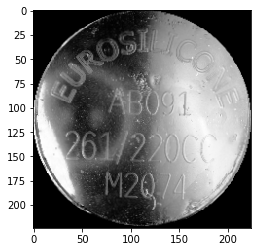

finito
FULL-2019-04-26-161409.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


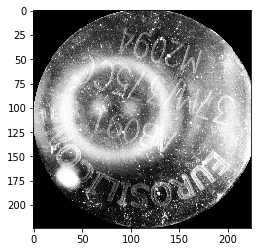

(1, 224, 224, 3)
classifying
Time =  0.05908942222595215
Classe =  163
Angle = -163


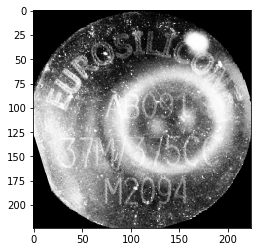

finito
FULL-2019-05-16-143218.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


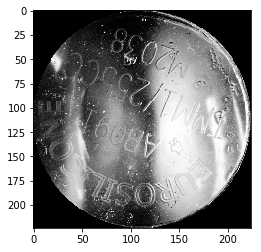

(1, 224, 224, 3)
classifying
Time =  0.05784273147583008
Classe =  158
Angle = -158


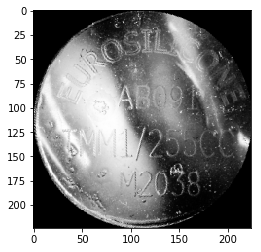

finito
FULL-2019-05-16-144802.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


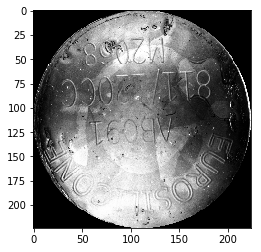

(1, 224, 224, 3)
classifying
Time =  0.059897422790527344
Classe =  179
Angle = -179


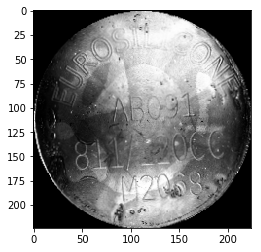

finito
FULL-2019-04-26-160236.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


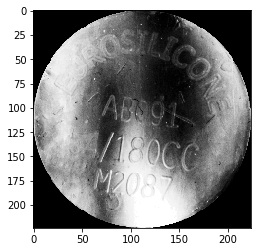

(1, 224, 224, 3)
classifying
Time =  0.05705857276916504
Classe =  355
Angle = -355


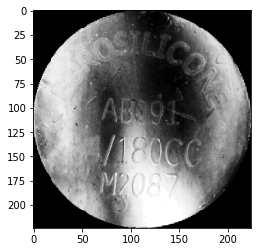

finito
FULL-2019-04-26-151235.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


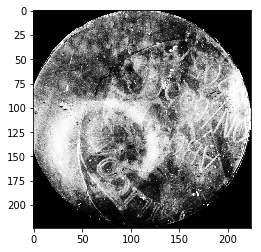

(1, 224, 224, 3)
classifying
Time =  0.05292534828186035
Classe =  294
Angle = -294


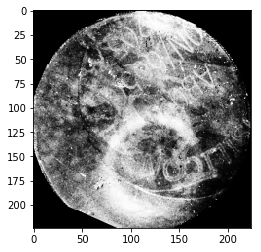

finito
FULL-2019-05-16-145625.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


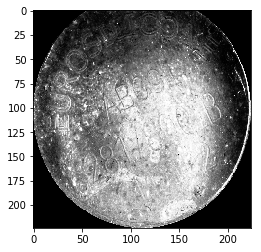

(1, 224, 224, 3)
classifying
Time =  0.051982879638671875
Classe =  21
Angle = -21


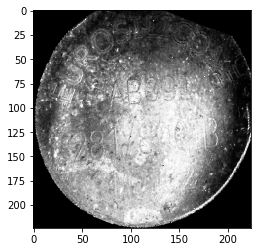

finito


In [4]:
#IMAGES_PATH = '../dataset/step3_orientationfixer/sply/img_test/img/'
IMAGES_PATH = '../dataset/step3_orientationfixer/img_test/img/'
#IMAGES_PATH = '../dataset/step3_orientationfixer/sply/img_test/vrac/062/'
images = os.listdir(IMAGES_PATH)
print(images)
for index, im in enumerate(images):
    print('============================================')
    print(im)
    HEIGHT = 224
    WIDTH = 224

    image = cv2.imread(IMAGES_PATH+im,0)
    image = cv2.resize(image,(HEIGHT,WIDTH))
    #image = imutils.rotate(image,200)
    print(image.shape)
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    print(image.shape)
    
    
    print(type(image))
    
    image = image/255
    #print(image[100][1:5])
    
    plt.imshow(image)
    plt.show()

    image4 = np.expand_dims(image, axis=0)# correct shape for classification
    print(image4.shape)
    
    start = time. time()
    classe = classify(image4,model)
    end = time. time()
    print('Time = ',end - start)
    
    print('Classe = ', classe)
    angle_corr = -1*classe
    print('Angle =',angle_corr)

    img3 = imutils.rotate(image,angle_corr)
    plt.imshow(img3)
    plt.show()
    '''
        output_dir = dir_final #+ str(k) + '/'
        print(output_dir)

        if not os.path.exists(output_dir):
            os.makedirs(output_dir)




        cv2.imwrite( output_dir+im, img3 )

    print('image ', k, 'done')
    """
    '''        
    print('finito')

In [5]:
DATA_DIR = '../dataset/step3_orientationfixer/without_crop/img_test/vrac/'
# generator for reading test data from folder
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    DATA_DIR,
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 1,
    class_mode = 'categorical',
    shuffle = False)

Found 78 images belonging to 2 classes.


In [6]:
predictions = model.predict_generator(
        test_generator,
        val_samples=78,
    )

/home/abert/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/abert/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `predict_generator` call to the Keras 2 API: `predict_generator(<keras_pre..., steps=78)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
#print(test_generator[316][0][0][112])

print(len(test_generator))
print(test_generator[0][1].shape)
print(test_generator[41][1])

78
(1, 2)
[[0. 1.]]


In [7]:
index=0
k=0
diff_mean=0
for index, pred in enumerate(predictions):
    #plt.imshow(test_generator[0])
    #plt.show()
    print("================================")
    print(index)
    classe = pred.argmax(axis=0)

    #works if 360 classes present
    #true_classe = test_generator[index][1].argmax(axis = 1)
    true_classenb = test_generator[index][1].argmax(axis = 1)
    print('indice =', test_generator[index][1])
    classes = [0,74]
    true_classe = classes[true_classenb[0]]
    diff = angle_difference(true_classe,classe)
    print("diff=",diff)
    if diff<30:
        print(pred)
        k += 1
    diff_mean += diff
    print('True class = ', true_classe)
    print('Predicted class = ', classe)
print("Diff_mean = ", diff_mean/39)    
print('K =',k)

0
indice = [[1. 0.]]
diff= 1
[7.16649517e-02 2.36728609e-01 1.16647944e-01 2.06012711e-01
 4.11686674e-02 1.13777611e-02 1.25678806e-02 4.15606909e-02
 2.11524833e-02 9.41253733e-03 1.14965290e-02 2.13641021e-03
 9.67332162e-04 7.74023938e-04 4.60337120e-04 2.52887985e-04
 1.27791078e-04 8.95057456e-05 2.34801919e-05 1.91809031e-05
 9.39293113e-06 8.52820449e-06 6.45523301e-07 1.63277298e-06
 6.91293678e-07 1.40367959e-07 1.63364732e-07 3.08805539e-07
 1.49898199e-07 1.39123742e-07 9.03097472e-08 3.51696805e-08
 1.90494589e-08 5.49284813e-08 8.44639292e-09 3.79969016e-08
 5.12571141e-08 1.85004172e-08 6.73236933e-09 6.55214620e-08
 1.06636859e-08 1.23841621e-08 1.14570398e-08 2.94450135e-08
 9.41223188e-09 4.53605731e-09 8.22077606e-09 1.10323013e-08
 1.64911516e-08 1.69558696e-08 1.59659468e-08 2.84610788e-08
 7.74651880e-08 1.74848921e-07 3.66129775e-08 2.45866545e-08
 3.38552553e-07 1.15909806e-07 5.76830352e-08 2.23375665e-08
 8.89242884e-08 4.74786654e-09 4.50579973e-09 2.74341630

 1.73652470e-02 1.79115422e-02 4.76124175e-02 5.56104295e-02]
True class =  0
Predicted class =  1
36
indice = [[1. 0.]]
diff= 3
[1.02649480e-01 1.93234742e-01 1.20876238e-01 2.60554790e-01
 4.63288091e-02 2.73715928e-02 1.17569240e-02 8.80904496e-03
 1.23229036e-02 3.83953773e-03 4.13501752e-04 6.62876046e-05
 3.51795061e-05 8.68322822e-05 9.25984023e-06 1.42377230e-05
 1.56931537e-06 8.46153867e-08 4.19467597e-07 3.15679038e-08
 5.98939920e-08 2.53350372e-08 5.86962756e-10 4.12460344e-10
 6.38135655e-10 8.79630868e-10 5.03890096e-10 2.00771200e-09
 1.10882255e-10 6.38723796e-10 1.69738612e-10 6.74495182e-11
 1.37407141e-10 9.64474056e-11 2.45283273e-11 1.67787659e-10
 6.18022356e-10 5.14211784e-10 1.95786110e-10 7.16999127e-10
 5.12285214e-10 5.16058030e-10 3.08588738e-10 5.78853354e-10
 3.68182880e-11 3.94234090e-11 4.71484962e-10 1.71809553e-10
 1.24734933e-09 8.54397275e-10 7.08589076e-10 3.74023923e-10
 3.57543573e-09 1.95526861e-09 4.45802451e-10 2.48969445e-09
 5.27447463e-09 9

indice = [[0. 1.]]
diff= 3
[7.05018977e-08 1.29756472e-07 1.24108199e-08 8.24144131e-09
 8.67830607e-09 6.65440538e-08 9.72428538e-09 3.07975299e-08
 4.16144168e-08 8.21096862e-08 1.08985120e-07 3.52627211e-07
 2.44142195e-09 2.45602678e-07 1.62032791e-07 3.20570024e-08
 1.10080663e-07 2.87573112e-08 1.75971255e-08 1.05148201e-08
 1.66112741e-07 7.67239143e-08 4.49195259e-09 2.50930281e-08
 2.18601635e-08 2.13850750e-08 7.57862750e-09 4.55093963e-09
 4.89578111e-09 3.24825633e-09 8.85936158e-10 5.75556092e-09
 9.81057813e-09 3.28422567e-10 1.30377154e-09 2.56568411e-09
 2.79468715e-09 9.74273440e-10 3.40917072e-10 2.06655337e-09
 2.66238898e-09 1.94136929e-09 3.70175135e-09 3.39303128e-08
 4.11692458e-09 4.67895234e-09 3.08335579e-08 5.23582200e-09
 9.08758651e-08 3.98775519e-08 1.42322989e-07 3.19573275e-07
 1.26630326e-07 8.48393356e-08 5.58427303e-07 2.87916833e-07
 1.05761337e-05 1.03478906e-05 1.62970082e-05 5.02256589e-05
 1.59100018e-05 1.89351820e-04 6.08257651e-05 1.90600380e-